In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import svm
import time

### Load data

In [6]:
traj_train = np.load('traj_train.npy')
labels_train = np.load('labels_train.npy')
print 'train traj and labels loaded'

traj_test = np.load('traj_test.npy')
labels_test = np.load('labels_test.npy')
print 'test traj and labels loaded'

train traj and labels loaded
test traj and labels loaded


### Params

In [7]:
slotSize = 0
clf_SVM = None

### Helper functions

In [34]:
def __formatIntoFeatureVectorsAndLabels(traj, labels):
    """
    Helper function. Converts the traj and labels into a feature vector matrix (design matrix) and a labels array, which is the proper format to input into the SVM.
    :param traj: the demodded trajectories in an np array, with 3 indices: iqIndex, trajIndex, timeIndex
    :param labels: the labels corresponding to the trajectories, 1d np array
    :return: inputVectors (each feature vector is the I vector concatted with the Q vector) and labels_ggexc (labels for each trajectory, 0 for gg, 1 for exc)
    """
    numTotalTraj = traj.shape[1]
    numTimeBins = traj.shape[2]  # 5000 #num time bins per traj
    
    print '@@@ Start slotting; time: ', time.time() - timeStart
    #: get inputVectors and labels_ggexc
    ###
    numSlots = numTimeBins / slotSize  # num slots per traj
    traj_slotted = np.zeros((2, numTotalTraj, numSlots))  # indices: iqIndex, labelIndex, trajIndex, slotIndex
    for trajIndex in np.arange(numTotalTraj):
        for j in np.arange(numSlots): #j is slotIndex
            traj_slotted[:, trajIndex, j] = traj[:, trajIndex, j*slotSize:j*slotSize+slotSize].mean(1)
#             traj_slotted[1, trajIndex, j] = traj[1, trajIndex, j*slotSize:j*slotSize+slotSize].mean()
    print '@@@ Finished slotting; time: ', time.time() - timeStart
    
#     print '@@@ Start concatting; time: ', time.time() - timeStart
    inputVectors = np.concatenate((traj_slotted[0, :, :], traj_slotted[1, :, :]), axis=1) #sample vectors to input into the SVM;
    labels_ggexc = np.array([0 if labels[i]==0 else 1 for i in np.arange(numTotalTraj) ]) # this groups gg as label 0, and exc as label 1
#     print '@@@ Finished concatting; time: ', time.time() - timeStart
    
    return inputVectors, labels_ggexc

In [9]:
def __findFidelity(inputVectors, labels_ggexc):
    """
    Helper function. Calculates the fidelity
    :param inputVectors:
    :param labels_ggexc:
    :return: fidelity
    """
    numTraj = inputVectors.shape[0]

    #: find train fidelity
    ###
    labels_ggexc_predicted = clf_SVM.predict(inputVectors)

    num_gg_exc = 0  # num of samples that are predicted 'gg' but are actually exc
    num_exc_gg = 0  # num of samples that are predicted 'exc' but are actually gg
    num_exc = 0  # total num of true exc sample
    num_gg = 0  # total num of true exc sample

    for i in np.arange(numTraj):
        if labels_ggexc[i] == 1:
            num_exc = num_exc + 1
            if labels_ggexc_predicted[i] == 0:
                num_gg_exc = num_gg_exc + 1
        else:
            num_gg = num_gg + 1
            if labels_ggexc_predicted[i] == 1:
                num_exc_gg = num_exc_gg + 1

    prob_gg_exc = 1.0 * num_gg_exc / num_exc
    prob_exc_gg = 1.0 * num_exc_gg / num_gg

    fid_ggexc = 1 - (prob_gg_exc + prob_exc_gg) / 2

    return fid_ggexc

### Fit the SVM

In [25]:
print type(traj.shape[2] / slotSize)
print traj.shape[2] / slotSize



<type 'int'>
100


In [35]:
### Testing _formatInto..


timeStart = time.time()
print '@@@ Start timing'
"""
Fits the SVM.

:param traj:
:param labels:
:param slotSize: size (number of time units) of each slot, for performing slot weights integration
:param tuneC: True if you want the method to tune C
:param lstC: None if you want to use the default list of C's to sweep through for finding the optimal C; should be an np array or a list.
:param validationFraction: fraction of the traj's to use as the validation set (tuning C happens on the validation set)
:return: self
"""
traj = traj_train
labels = labels_train
slotSize=50 
tuneC=False
lstC=None
validationFraction=0.25




numTotalTraj = traj.shape[1]

# print '@@@ Start formatIntoFeatureVectorsAndLabels; time: ', time.time() - timeStart
# inputVectors, labels_ggexc = __formatIntoFeatureVectorsAndLabels(traj, labels)
# print '@@@ Finished formatIntoFeatureVectorsAndLabels; time: ', time.time() - timeStart

@@@ Start timing


In [48]:
test = np.random.rand(2,1000,10000)

%timeit test.reshape(2, 100, 50, -1).mean(2)


100 loops, best of 3: 19.7 ms per loop


@@@ Start timing
@@@ Start formatIntoFeatureVectorsAndLabels; time:  14.8153870106
@@@ Start slotting; time:  14.8164160252
@@@ Finished slotting; time:  370.909968138
@@@ Start concatting; time:  370.935969114
@@@ Finished concatting; time:  373.185858011
@@@ Finished formatIntoFeatureVectorsAndLabels; time:  373.24399519
On slotSize = 5 ; fid = 0.88883829889
@@@ Start formatIntoFeatureVectorsAndLabels; time:  419.86067009
@@@ Start slotting; time:  419.86484313
@@@ Finished slotting; time:  602.961499214
@@@ Start concatting; time:  602.966474056
@@@ Finished concatting; time:  603.66477704
@@@ Finished formatIntoFeatureVectorsAndLabels; time:  603.697765112
On slotSize = 10 ; fid = 0.867458208062
@@@ Start formatIntoFeatureVectorsAndLabels; time:  641.717657089
@@@ Start slotting; time:  641.718109131
@@@ Finished slotting; time:  724.189835072
@@@ Start concatting; time:  724.19530201
@@@ Finished concatting; time:  724.460434198
@@@ Finished formatIntoFeatureVectorsAndLabels; time

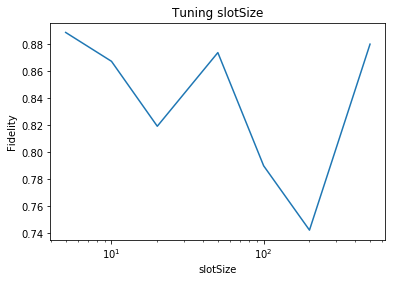

In [32]:
### 

timeStart = time.time()
print '@@@ Start timing'
"""
Fits the SVM.

:param traj:
:param labels:
:param slotSize: size (number of time units) of each slot, for performing slot weights integration
:param tuneC: True if you want the method to tune C
:param lstC: None if you want to use the default list of C's to sweep through for finding the optimal C; should be an np array or a list.
:param validationFraction: fraction of the traj's to use as the validation set (tuning C happens on the validation set)
:return: self
"""
traj = traj_train
labels = labels_train
slotSize=50 
tuneC=False
lstC=None
validationFraction=0.25




numTotalTraj = traj.shape[1]

# print '@@@ Start formatIntoFeatureVectorsAndLabels; time: ', time.time() - timeStart
# inputVectors, labels_ggexc = __formatIntoFeatureVectorsAndLabels(traj, labels)
# print '@@@ Finished formatIntoFeatureVectorsAndLabels; time: ', time.time() - timeStart

# #: fit the clf_SVM, tune C if chosen to
# ###
# inputVectors_shuffled, labels_ggexc_shuffled = shuffle(inputVectors, labels_ggexc, random_state=0)

if tuneC == False:
    clf_SVM = svm.LinearSVC(C=1.0)
    clf_SVM.fit(inputVectors_shuffled, labels_ggexc_shuffled)
# else:
#     print 'Tuning C...'
#     lstFid = []
#     startIndex_validation = int(numTotalTraj * (1 - validationFraction))
#     if lstC is None:
#         lstC = 10 ** np.linspace(-15, -7, 30)
#     for C in lstC:
#         clf_SVM = svm.LinearSVC(C=C)
#         clf_SVM.fit(inputVectors_shuffled[0:startIndex_validation], labels_ggexc_shuffled[0:startIndex_validation])
#         temp_fid = __findFidelity(inputVectors_shuffled[startIndex_validation: ], labels_ggexc_shuffled[startIndex_validation: ])
#         print 'On C =', C, '; fid =', temp_fid
#         lstFid = lstFid + [temp_fid]

#     plt.figure()
#     plt.plot(lstC, lstFid)
#     plt.gca().set_xscale('log')
#     plt.title('Tuning C')
#     plt.xlabel('C')
#     plt.ylabel('Fidelity')

#     optimalC = lstC[np.argmax(lstFid)]
#     print 'Chose optimal C = ', optimalC
    
#     print '@@@ Start fitting the SVM; time: ', time.time() - timeStart
#     clf_SVM = svm.LinearSVC(C=optimalC)
#     clf_SVM.fit(inputVectors_shuffled, labels_ggexc_shuffled)
#     print '@@@ Finished fitting the SVM; time: ', time.time() - timeStart
    
    
#: Tune slotSize

lstFid_tuneSlotSize = []
startIndex_validation = int(numTotalTraj * (1 - validationFraction))
lstSlotSize = np.array([5, 10, 20, 50, 100, 200, 500])
for s in lstSlotSize:
    slotSize = s
    print '@@@ !Start formatIntoFeatureVectorsAndLabels; time: ', time.time() - timeStart
    inputVectors, labels_ggexc = __formatIntoFeatureVectorsAndLabels(traj, labels)
    print '@@@ !Finished formatIntoFeatureVectorsAndLabels; time: ', time.time() - timeStart
    inputVectors_shuffled, labels_ggexc_shuffled = shuffle(inputVectors, labels_ggexc, random_state=0)
    clf_SVM = svm.LinearSVC(C=1.0)
    clf_SVM.fit(inputVectors_shuffled, labels_ggexc_shuffled)
    temp_fid = __findFidelity(inputVectors_shuffled[startIndex_validation: ], labels_ggexc_shuffled[startIndex_validation: ])
    print 'On slotSize =', slotSize, '; fid =', temp_fid
    lstFid_tuneSlotSize = lstFid_tuneSlotSize + [temp_fid]

plt.figure()
plt.plot(lstSlotSize, lstFid_tuneSlotSize)
plt.gca().set_xscale('log')
plt.title('Tuning slotSize')
plt.xlabel('slotSize')
plt.ylabel('Fidelity')

    
    
    
    
    
    
# print '@@@ Start finding train fidelity; time: ', time.time() - timeStart
# fid_ggexc = __findFidelity(inputVectors_shuffled, labels_ggexc_shuffled)
# print '@@@ Finished finding train fidelity; time: ', time.time() - timeStart

# print 'train fid_ggexc: ', fid_ggexc

### Score (test fidelity)

In [17]:
timeStart = time.time()

traj = traj_test
labels= labels_test

print '@@@ Start formatIntoFeatureVectorsAndLabels; time: ', time.time() - timeStart
inputVectors, labels_ggexc = __formatIntoFeatureVectorsAndLabels(traj, labels)
print '@@@ Finished formatIntoFeatureVectorsAndLabels; time: ', time.time() - timeStart

fid_ggexc = __findFidelity(inputVectors, labels_ggexc)

print 'test fid: ', fid_ggexc

@@@ Start formatIntoFeatureVectorsAndLabels; time:  0.00176692008972
@@@ Finished formatIntoFeatureVectorsAndLabels; time:  8.84163498878
test fid:  0.906666666667


In [29]:
i = 3.3e-10
print type(i)

<type 'float'>
